In [66]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json
import sys
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/scripts/')
import assembly_tree as at
import graph_tool.all as gt
from matplotlib.colors import to_rgba
from tqdm import tqdm
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/')
import network_design as nd
import math
from scipy.special import binom

In [67]:
# Find biggish protein
with open('../data/properties.json', 'r') as f:
    properties = json.load(f)

In [237]:
# Read in example protein
protein = nx.read_edgelist('../data/protein_complex/proteins/human/edgefiles/CPX-1919.edge',nodetype=int)
X = np.loadtxt('../data/protein_complex/proteins/human/Xfiles/X_CPX-1919.txt')
X = np.array([[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1]])


In [238]:
O = np.array([[0,1,1],[1,0,1],[1,1,2]])
N = X.sum(axis=0)

In [239]:
p, samples,idx = nd.prob_dist(X,O,O.sum(axis=1),max_iters=10000,verbose=True,labeled=True)

100%|██████████| 10000/10000 [05:08<00:00, 32.39it/s]


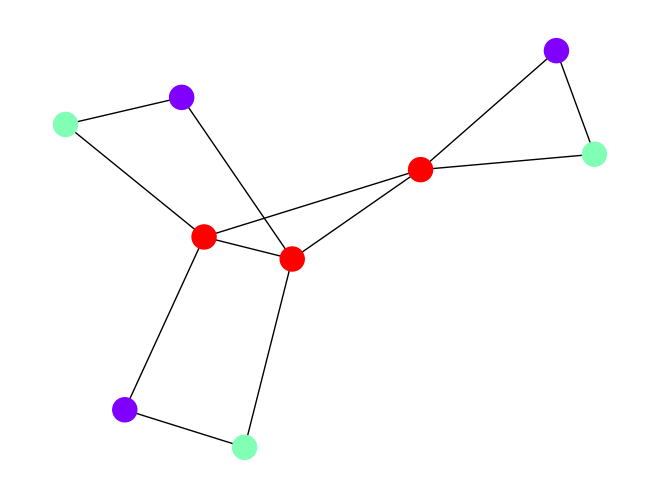

In [246]:
at.draw_network(samples[-5],X)

216

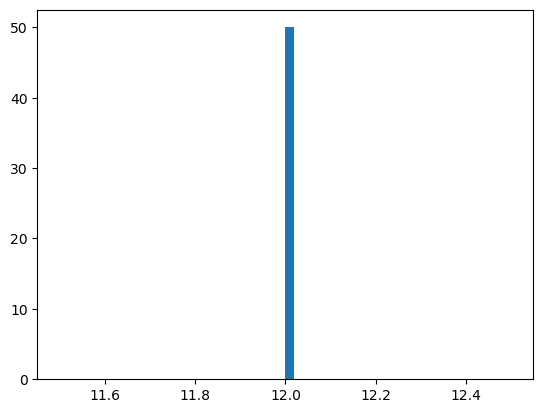

In [241]:
plt.hist([samples[i].number_of_edges() for i in range(len(samples))], bins=50, density=True)
len(samples)

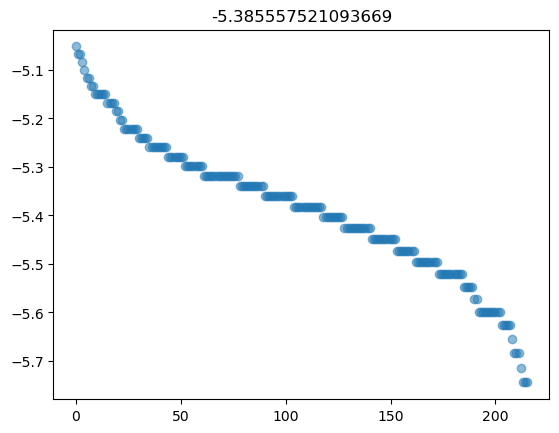

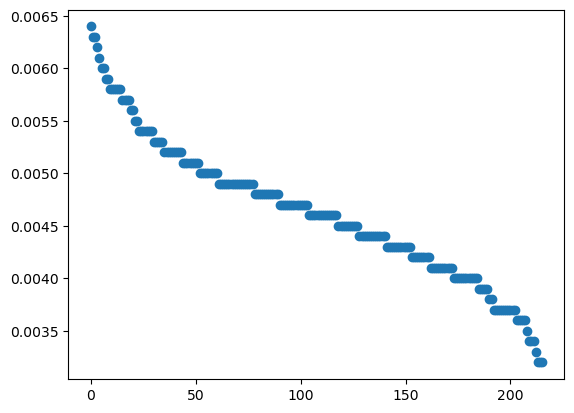

In [242]:
plt.plot(np.arange(len(p)),np.log(p[idx]) - np.log(np.sum(p)),'o',alpha=.5)
plt.title(np.mean(np.log(p[idx]) - np.log(np.sum(p))))
plt.show()
plt.plot(np.arange(len(p)),p[idx]/np.sum(p),'o')
# plt.plot(np.arange(len(samples)),[p_ij(samples[i],X,O) for i in idx],'o')

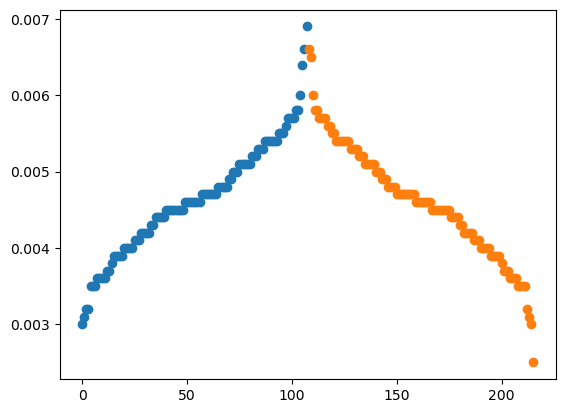

In [128]:
# Plot every other values of p[idx]
plt.plot(np.arange(len(p)/2),p[idx][::2][::-1]/np.sum(p),'o')
# Plot the rest of the values
plt.plot(np.arange(len(p)//2,len(p)),p[idx][1::2]/np.sum(p),'o')


/var/folders/8t/4z1vq2xd5790h0y5jrvphttr0000gp/T/ipykernel_75779/2872163818.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,-np.log(x/(1-x)))
/var/folders/8t/4z1vq2xd5790h0y5jrvphttr0000gp/T/ipykernel_75779/2872163818.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,-np.log(x/(1-x)))


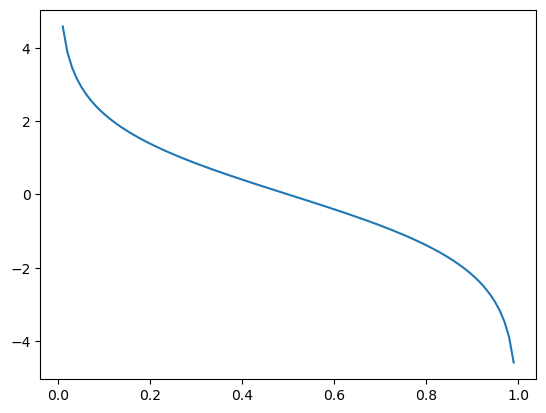

In [132]:
x = np.linspace(0,1,100)
plt.plot(x,-np.log(x/(1-x)))

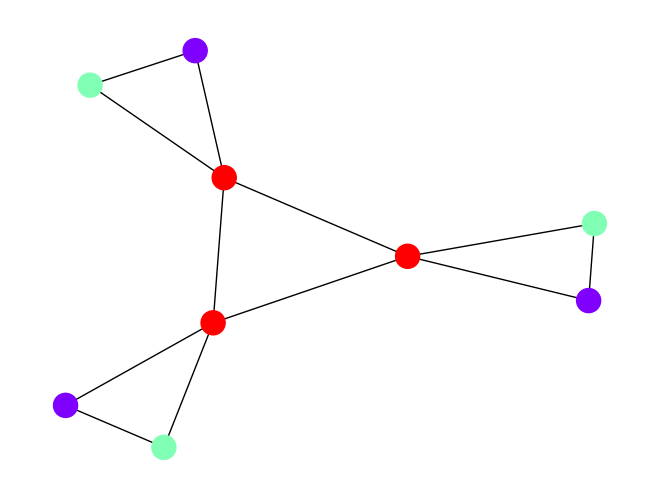

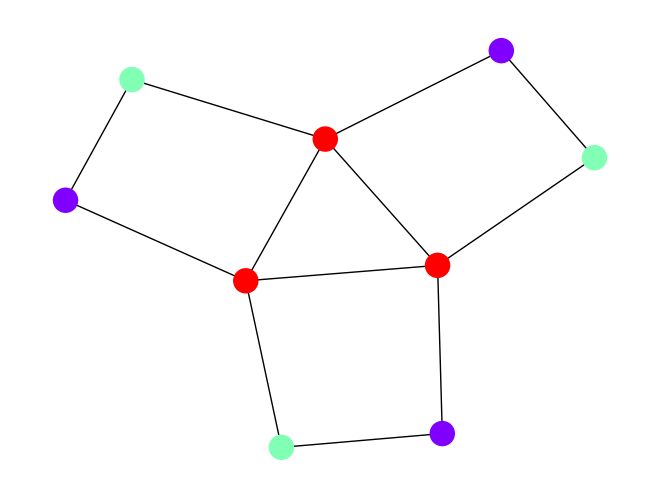

In [130]:
at.draw_network(samples[idx[0]],X)
plt.show()
at.draw_network(samples[idx[-1]],X)
plt.show()

In [49]:
q = 1
for i in range(3):
    for j in range(i,3):
        Lij = np.min([O[i,j]*N[i],O[j,i]*N[j]])
        if Lij == 0:
            q *= 1
        else:
            q *= (Lij / (math.factorial(O[i,j])**(N[i]) * math.factorial(O[j,i])**(N[j])))

In [50]:
-np.log(q)

0.4575811092471784

In [53]:
def p_ij(g,X,O):
    """
    Calculate the probability of the graph g given the
    assembly tree X and the observation matrix O.
    
    Parameters:
    g (networkx.Graph): The input graph.
    X (numpy.ndarray): The assembly tree matrix.
    O (numpy.ndarray): The observation matrix.
    
    Returns:
    float: probability of the graph g given the assembly tree X and observation matrix O.
    """
    p = 0
    N = X.sum(axis=0)
    for i in range(g.number_of_nodes()):
        label_i = np.argmax(X[i])
        for j in range(g.number_of_nodes()):
            label_j = np.argmax(X[j])
            pij = np.min([O[label_i, label_j], O[label_j, label_i]]) / np.max([N[label_i], N[label_j]])
            if g.has_edge(i, j):
                p += np.log(pij)
            else:
                p += np.log(1 - pij)
    return p

In [224]:
def total_number(N,O):
    total = np.zeros((len(N), len(N)))
    for i in range(len(N)):
        for j in range(i,len(N)):
            if i == j:
                total[i,j] = (N[i] * (N[i] - 1) / 2) / (math.factorial(O[i,i])**(N[i]))
            else:
                print(i,j,N[i],N[j],(math.factorial(O[i,j])**N[i] * math.factorial(O[j,i])**N[j]))
                total[i,j] = N[i] * N[j] / (math.factorial(O[i,j])**N[i] * math.factorial(O[j,i])**N[j])
    return total

In [225]:
def pij(N,O):
    total = total_number(N,O)
    p = 1.0
    for i in range(len(N)):
        for j in range(i,len(N)):
            
            if i == j:
                Lij = O[i,i] * (N[i] - 1)
                pij = O[i,i] / (N[i] - 1)
            else:
                Lij = np.min([O[i,j]*N[i],O[j,i]*N[j]])
                pij = np.min([O[i, j], O[j, i]]) / np.max([N[i], N[j]])
            print(pij,Lij,total[i,j])
            combo = binom(total[i,j],Lij)
            print(combo)
            p *= combo * pij ** Lij * (1 - pij) ** (total[i,j] - Lij)
            print(p)
    return p
            


In [226]:
N = X.sum(axis=0,dtype=int)
O, N

(array([[0., 1., 1., 2.],
        [1., 3., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([2, 2, 2, 2, 2, 2]))

In [227]:
total_number(X4.sum(axis=0,dtype=int),O.astype(int))

0 1 6 6 1
0 2 6 6 1
0 3 6 12 64
1 2 6 6 1
1 3 6 12 1
2 3 6 12 1


array([[1.50000000e+01, 3.60000000e+01, 3.60000000e+01, 1.12500000e+00],
       [0.00000000e+00, 3.21502058e-04, 3.60000000e+01, 7.20000000e+01],
       [0.00000000e+00, 0.00000000e+00, 1.50000000e+01, 7.20000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.60000000e+01]])

In [230]:
(12*6)/64

1.125

In [106]:
np.log(0.020375294877797375*1)

-3.893432147430004

In [133]:
big_proteins = []
for prot_type in ['human','mouse','yeast']:
    subprot = properties['proteins'][prot_type]
    for s in subprot:
        if subprot[s]['N'] > 10:
            big_proteins.append(s)

In [134]:
big_proteins

['CPX-1919',
 'CPX-1949',
 'CPX-2194',
 'CPX-2234',
 'CPX-2236',
 'CPX-2386',
 'CPX-2387',
 'CPX-2391',
 'CPX-2393',
 'CPX-2537',
 'CPX-2640',
 'CPX-2808',
 'CPX-2877',
 'CPX-3227',
 'CPX-3762',
 'CPX-3905',
 'CPX-4442',
 'CPX-4742',
 'CPX-553',
 'CPX-560',
 'CPX-5774',
 'CPX-6036',
 'CPX-6123',
 'CPX-6124',
 'CPX-6143',
 'CPX-6159',
 'CPX-6169',
 'CPX-6170',
 'CPX-6177',
 'CPX-6236',
 'CPX-6365',
 'CPX-6366',
 'CPX-6381',
 'CPX-6382',
 'CPX-7666',
 'CPX-7667',
 'CPX-7668',
 'CPX-7669',
 'CPX-7670',
 'CPX-7671',
 'CPX-7674',
 'CPX-7675',
 'CPX-8148',
 'CPX-8182',
 'CPX-8183',
 'CPX-846',
 'CPX-8806',
 'CPX-8841',
 'CPX-8842',
 'CPX-9001',
 'CPX-9002',
 'CPX-9003',
 'CPX-902',
 'CPX-9022',
 'CPX-9341',
 'CPX-9481',
 'CPX-9521',
 'CPX-9541',
 'CPX-1053',
 'CPX-1156',
 'CPX-1162',
 'CPX-1192',
 'CPX-1193',
 'CPX-1642',
 'CPX-1659',
 'CPX-1664',
 'CPX-1707',
 'CPX-1721',
 'CPX-1722',
 'CPX-1800',
 'CPX-1849',
 'CPX-1939',
 'CPX-2122',
 'CPX-2156',
 'CPX-2262',
 'CPX-2660',
 'CPX-2662',
 'C

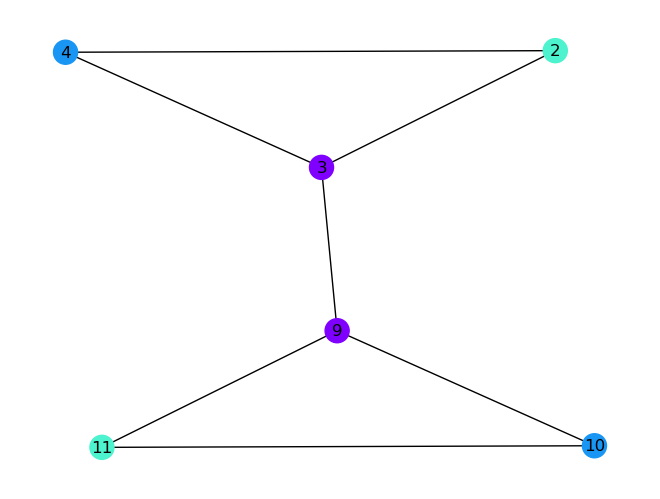

In [143]:
protein2 = nx.read_edgelist(f'../data/protein_complex/proteins/human/edgefiles/{big_proteins[1]}.edge',nodetype=int)
X2 = np.loadtxt(f'../data/protein_complex/proteins/human/Xfiles/X_{big_proteins[1]}.txt')
at.draw_network(protein2,X2,with_labels=True)


In [139]:
O = nd.extract_O(protein2, X2)[:3,:][:,:3]


array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [144]:
p2, samples2, idx2 = at.prob_dist(X2[[2,4,3,9,10,11],:3], O, O.sum(axis=1), max_iters=10000, verbose=True, labeled=True)

100%|██████████| 10000/10000 [00:08<00:00, 1152.56it/s]


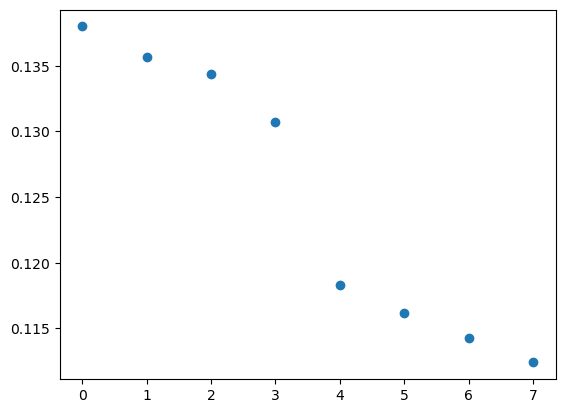

In [146]:
plt.plot(np.arange(len(p2)),p2[idx2]/np.sum(p2),'o')

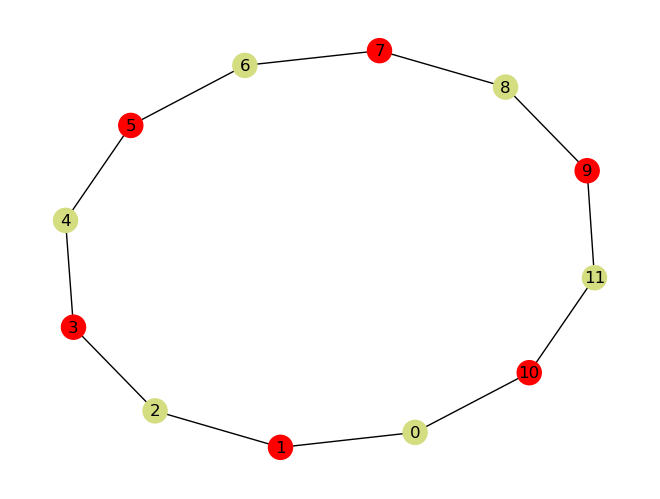

In [170]:
protein3 = nx.read_edgelist(f'../data/protein_complex/proteins/human/edgefiles/{big_proteins[24]}.edge',nodetype=int)
X3 = np.loadtxt(f'../data/protein_complex/proteins/human/Xfiles/X_{big_proteins[24]}.txt')
at.draw_network(protein3,X3,with_labels=True)

In [171]:
O = np.array([[0,2],[2,0]])

In [174]:
p3, samples3, idx3 = at.prob_dist(X3[:-2,2:], O, O.sum(axis=1), max_iters=10000, verbose=True, labeled=True)

100%|██████████| 7216/7216 [1:21:09<00:00,  1.48it/s]


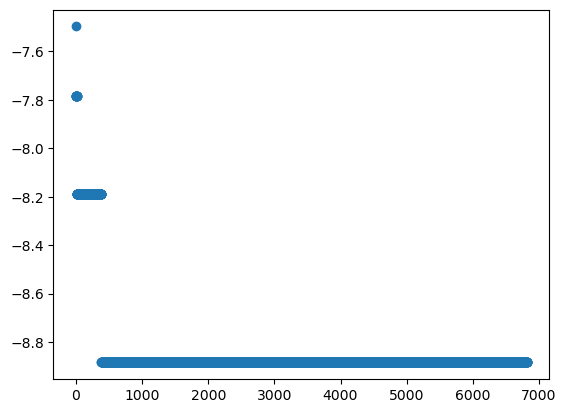

In [178]:
plt.plot(np.log(p3[idx3]/np.sum(p3)),'o',alpha=1)

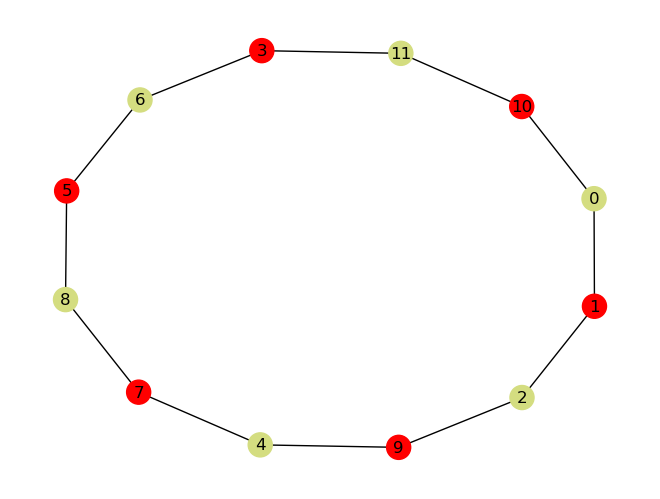

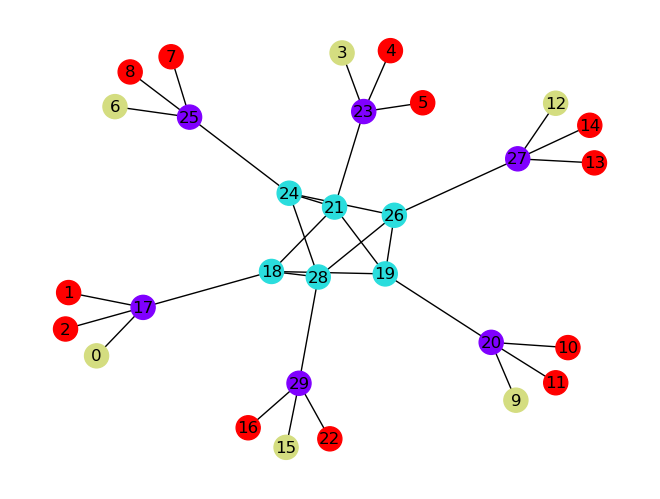

In [186]:
protein4 = nx.read_edgelist(f'../data/protein_complex/proteins/human/edgefiles/{big_proteins[26]}.edge',nodetype=int)
X4 = np.loadtxt(f'../data/protein_complex/proteins/human/Xfiles/X_{big_proteins[26]}.txt')
at.draw_network(protein4,X4,with_labels=True)

In [187]:
O = nd.extract_O(protein4, X4)

In [189]:
p4, samples4, idx4 = at.prob_dist(X4, O, O.sum(axis=1), max_iters=10000, verbose=True, labeled=True)

100%|██████████| 3818/3818 [31:58<00:00,  1.99it/s]


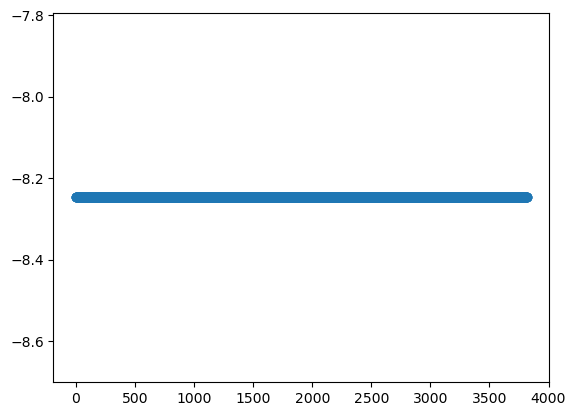

In [191]:
plt.plot(np.log(p4[idx4]/np.sum(p4)),'o',alpha=1)

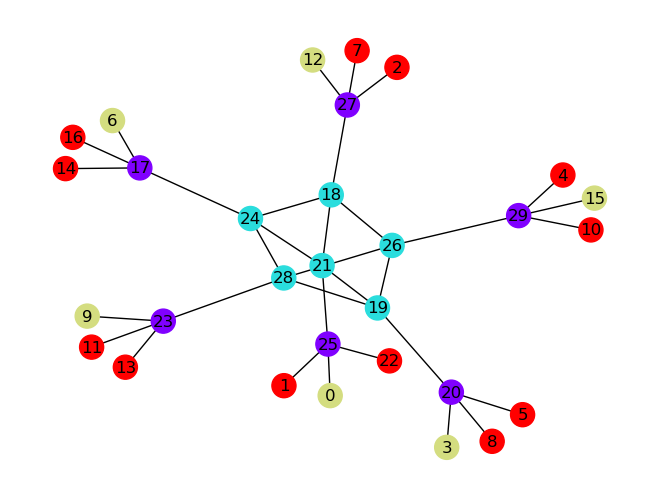

In [195]:
at.draw_network(samples4[idx4[-3]], X4, with_labels=True)

In [205]:
X4

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])